In [1]:
print("all ok")

all ok


In [76]:

from sklearn.datasets import make_classification

x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,
                        class_sep=20)

In [77]:
import matplotlib.pyplot as plt

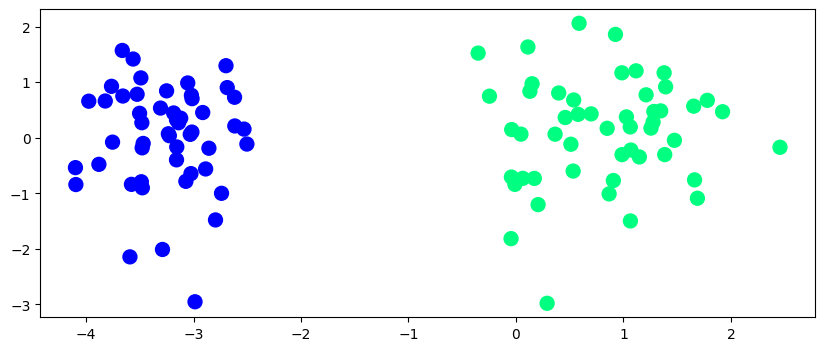

In [78]:
plt.figure(figsize=(10,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

### Perceptron trick

In [79]:
import numpy as np

In [80]:
def step(x):
    return 1 if x>0 else 0

In [81]:
def perceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,x.shape[0])
        y_hat=step(np.dot(x[j],weights))
        weights=weights+ lr *(y[j]-y_hat)*x[j]

    return weights[0],weights[1:] 

In [82]:
intercept,coef=perceptron(x,y)

In [83]:
intercept

np.float64(1.3000000000000003)

In [84]:
coef

array([1.0198596 , 0.33857969])

In [85]:
# make the value of m,b in 2 dimension

m=-coef[0]/coef[1]
b=-intercept/coef[1]

In [86]:
b

np.float64(-3.8395687654294357)

In [87]:
x_input=np.linspace(-3,3,100)
y_input=m * x_input + b

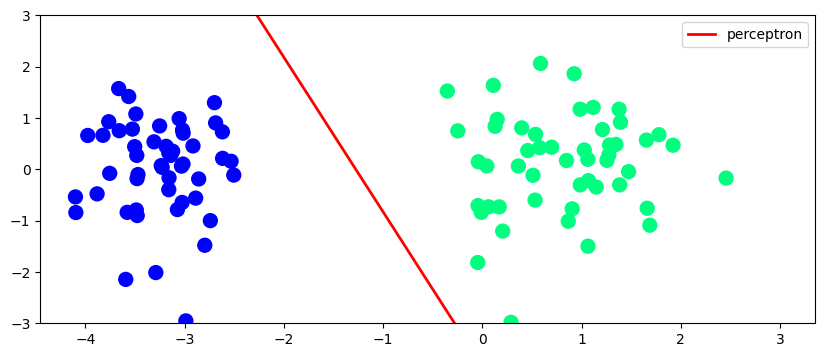

In [88]:
plt.figure(figsize=(10,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='red',linewidth=2,label='perceptron')
plt.legend()
plt.ylim(-3,3)
plt.show()

### Sigmoid function

In [89]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [90]:
def sigmid_logistic(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,x.shape[0])
        y_hat=sigmoid(np.dot(x[j],weights))
        weights=weights+ lr *(y[j]-y_hat)*x[j]

    return weights[0],weights[1:] 

In [91]:
intercept,coef=sigmid_logistic(x,y)

In [92]:
print(intercept)
print(coef)

2.8816217313113617
[2.84248829 0.14128948]


In [93]:
m=-coef[0]/coef[1]
b=-intercept/coef[1]
print(m)
print(b)

-20.118187121801075
-20.395160592858165


In [94]:
x_input_sig=np.linspace(-3,3,100)
y_input_sig=m * x_input + b

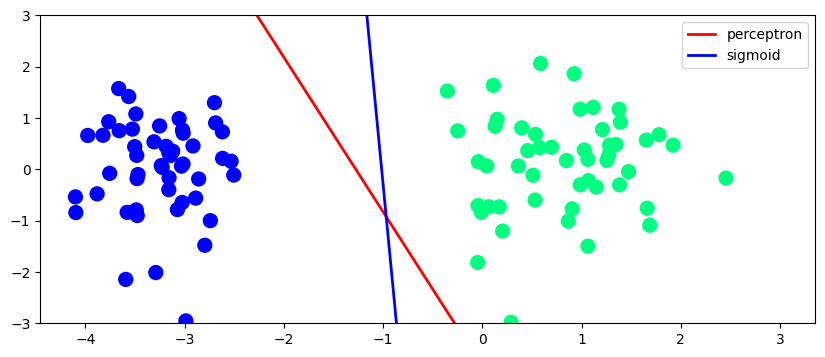

In [95]:
plt.figure(figsize=(10,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='red',linewidth=2,label='perceptron')
plt.plot(x_input_sig,y_input_sig,color='blue',linewidth=2,label='sigmoid')
plt.legend()
plt.ylim(-3,3)
plt.show()

### sklearn-logistic

In [96]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(penalty='l2',solver='saga')

logistic.fit(x,y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [97]:
m=logistic.coef_[0][0]/logistic.coef_[0][1]
b=logistic.intercept_[0]/logistic.coef_[0][1]

In [98]:
logistic.coef_

array([[2.36404285, 0.02201014]])

In [99]:
x_input_log=np.linspace(-3,3,100)
y_input_log=m * x_input_log + b

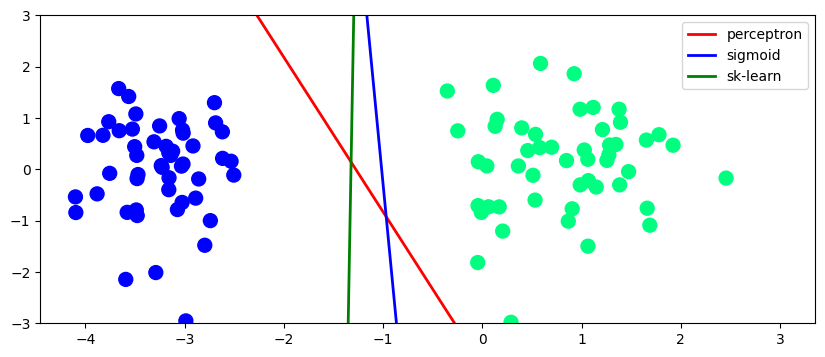

In [100]:
plt.figure(figsize=(10,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='red',linewidth=2,label='perceptron')
plt.plot(x_input_sig,y_input_sig,color='blue',linewidth=2,label='sigmoid')
plt.plot(x_input_log,y_input_log,color='green',linewidth=2,label='sk-learn')
plt.legend()
plt.ylim(-3,3)
plt.show()

### Gradient-decent

In [114]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [134]:
def gd(x,y):
    
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.6
    
    for i in range(10000):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr*(np.dot((y-y_hat),x)/x.shape[0])
        
    return weights[1:],weights[0]

In [135]:
coef,intercept=gd(x,y)

In [136]:
coef

array([5.46261312, 0.26869793])

In [137]:
m=-coef[0]/coef[1]
b=-intercept/coef[1]
print(m)
print(b)

-20.32994107928127
-25.006540365101248


In [138]:
x_input_gd=np.linspace(-3,3,100)
y_input_gd=m * x_input_gd + b

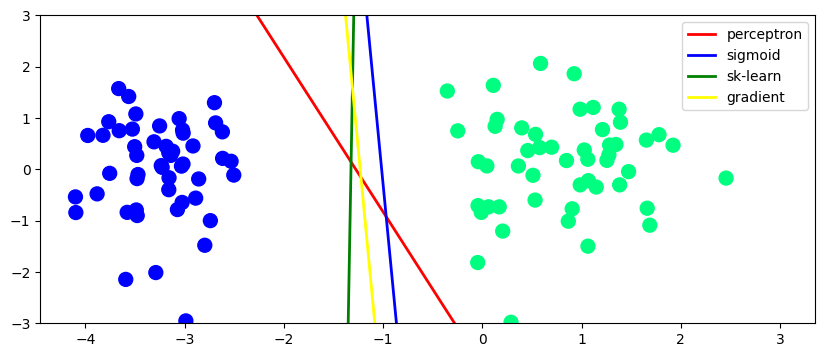

In [139]:
plt.figure(figsize=(10,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='red',linewidth=2,label='perceptron')
plt.plot(x_input_sig,y_input_sig,color='blue',linewidth=2,label='sigmoid')
plt.plot(x_input_log,y_input_log,color='green',linewidth=2,label='sk-learn')
plt.plot(x_input_gd,y_input_gd,color='yellow',linewidth=2,label='gradient')
plt.legend()
plt.ylim(-3,3)
plt.show()

In [140]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [141]:
def gradient_decent(x,y):
    
    m = []
    b = []
    
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.6
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr*(np.dot((y-y_hat),x)/x.shape[0])
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [142]:
m,b=gradient_decent(x,y)

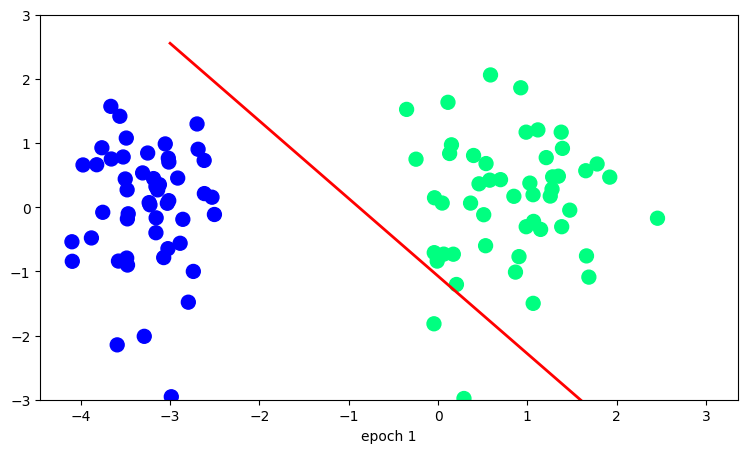

In [143]:
fig, ax = plt.subplots(figsize=(9,5))

x_i=np.linspace(-3,3,100)
y_i=x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
f = r"./images/animation_gradient.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)